## Main analyses part:
Steps:
- Create the following visualizations:

        1) A bar chart showing total sales by product category.

        2) A line chart showing sales trends over time (monthly or quarterly).

        3) A pie chart or bar chart showing the contribution of the top 5 customers to total sales.

        Ensure each chart is properly labeled with titles, axis labels, and legends.

Deliverables:
        A Python script containing:
    
        Code for generating the visualizations using Matplotlib/Seaborn.

A brief description for each chart, explaining the key insights from the visualization.



In [6]:
# Importing libriaries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
# Data Sets
customers_csv = pd.read_csv('olist_customers_dataset.csv')
geolocation_csv = pd.read_csv('olist_geolocation_dataset.csv')
ordered_items_csv = pd.read_csv('olist_order_items_dataset.csv') 
order_payments_csv = pd.read_csv('olist_order_payments_dataset.csv')
reviews_csv = pd.read_csv('olist_order_reviews_dataset.csv')
orders_csv = pd.read_csv('olist_orders_dataset.csv')
products_csv = pd.read_csv('olist_products_dataset.csv')
sellers_csv = pd.read_csv('olist_sellers_dataset.csv')
category_csv = pd.read_csv('product_category_name_translation.csv')

## Task 1

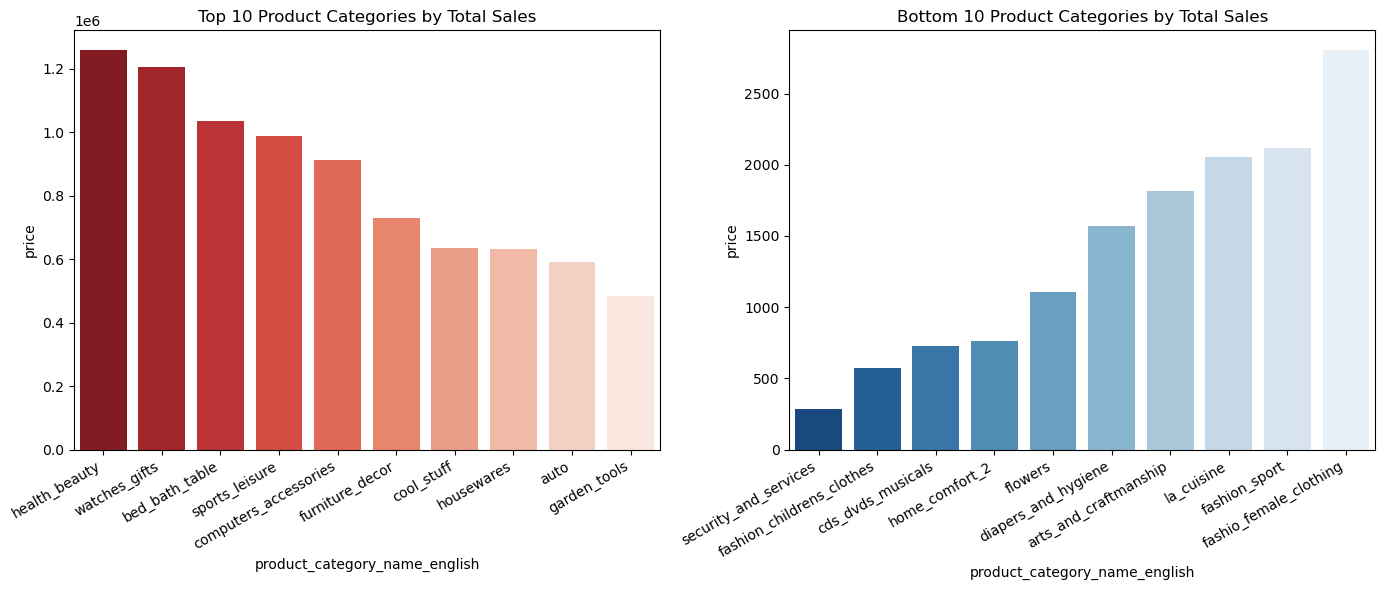

In [9]:

# Step 1: Merge the DataFrames
df_sales = pd.merge(products_csv, ordered_items_csv, on='product_id')
df_sales = pd.merge(df_sales, category_csv, on='product_category_name')

# Step 2: Group by product category and sum the prices
df_sales = df_sales.groupby('product_category_name_english')['price'].sum().reset_index()

# Step 3: Get the top and bottom sales categories
df_sales_top = df_sales.nlargest(10, 'price')
df_sales_bottom = df_sales.nsmallest(10, 'price')

# Step 4: Set up the figure for two subplots
plt.figure(figsize=(14, 6))

# Define a color palette function for top categories
top_colors = sns.color_palette("Reds", n_colors=len(df_sales_top))
top_colors = [top_colors[i] for i in np.argsort(df_sales_top['price'].values)]

# Plot for Top 10 categories
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x='product_category_name_english', y='price', data=df_sales_top, hue='product_category_name_english', palette=top_colors, legend=False)
plt.title('Top 10 Product Categories by Total Sales')
plt.xticks(rotation=30, ha='right')

# Define a color palette function for bottom categories
bottom_colors = sns.color_palette("Blues", n_colors=len(df_sales_bottom))
bottom_colors = [bottom_colors[i] for i in np.argsort(-df_sales_bottom['price'].values)]  # reverse sorting for lower prices

# Plot for Bottom 10 categories
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.barplot(x='product_category_name_english', y='price', data=df_sales_bottom, hue='product_category_name_english', palette=bottom_colors, legend=False)
plt.title('Bottom 10 Product Categories by Total Sales')
plt.xticks(rotation=30, ha='right')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


## Key insights from Task 1
- 1)
  Top 10 Product Categories by Total Sales:

    Health and Beauty: This category leads in sales, indicating strong demand and popularity.
    
    Watches and Gifts: This category also performs well, suggesting it's a sought-after category.
    
    Bed, Bath, and Table: Consistent sales in this category highlight its importance in daily life.
    
    Computers and Accessories: This category's performance reflects the growing digitalization and reliance on technology.
    
    Furniture and Decor: The demand for home furnishings and decor suggests a focus on home improvement and comfort.
    
- 2)
  Bottom 10 Product Categories by Total Sales:

    Security and Services: This category might require more marketing or product development to increase sales.

    Fashion Children's Clothes: While children's fashion can be a niche market, it might need more targeted marketing to boost sales.

    CDs, DVDs, and Musicals: The decline in physical media sales might impact this category.

    Diapers and Hygiene: This category's performance could be influenced by factors like birth rates and economic conditions.

    Arts and Craftsmanship: This category might benefit from promoting its unique and creative offerings.


## Task 2

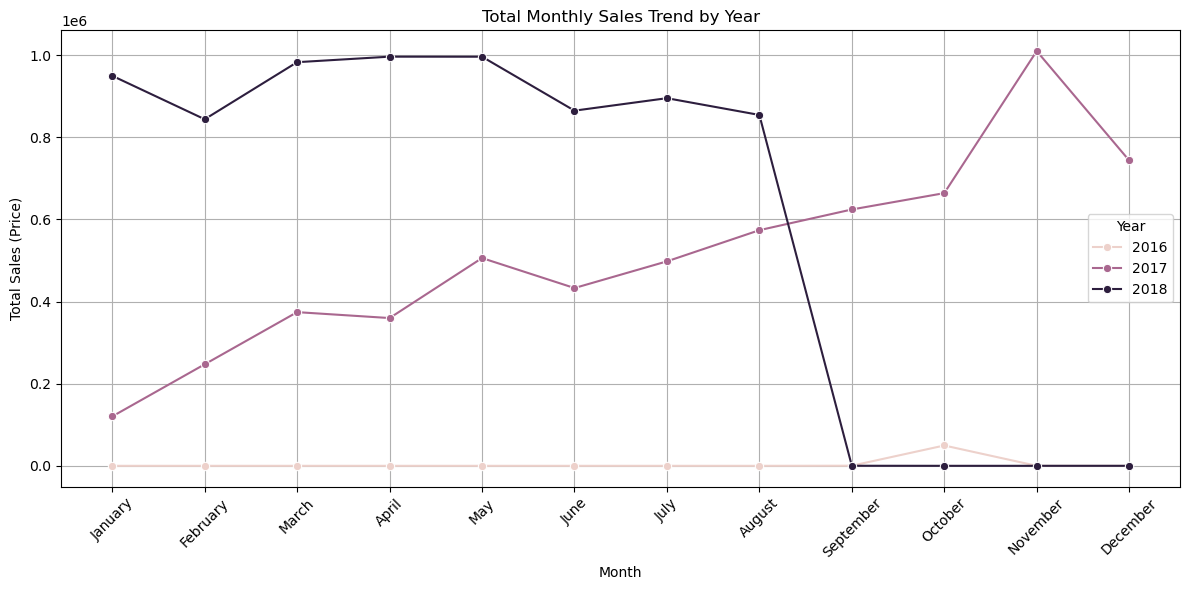

In [21]:
# Showing the Monthly Sales Trend by per yer

# Step 1: Merge the DataFrames
df_line = pd.merge(orders_csv, ordered_items_csv, on='order_id')

# Step 2: Convert 'order_purchase_timestamp' column to datetime format
df_line['order_purchase_timestamp'] = pd.to_datetime(df_line['order_purchase_timestamp'])

# Step 3: Extract the month name and year
df_line['Year'] = df_line['order_purchase_timestamp'].dt.year
df_line['Month name'] = df_line['order_purchase_timestamp'].dt.month_name()

# Step 4: Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Step 5: Convert 'Month name' to a categorical type with the defined order
df_line['Month name'] = pd.Categorical(df_line['Month name'], categories=month_order, ordered=True)

# Step 6: Group by 'Year' and 'Month name' and sum the 'price' with observed=False
df_sales_by_month_year = df_line.groupby(['Year', 'Month name'], observed=False)['price'].sum().reset_index()

# Step 7: Sort by Year and Month
df_sales_by_month_year = df_sales_by_month_year.sort_values(['Year', 'Month name'])

# Step 8: Plotting with Seaborn
plt.figure(figsize=(12, 6))

# Use Seaborn's lineplot for better visualization
sns.lineplot(data=df_sales_by_month_year, x='Month name', y='price', hue='Year', marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales (Price)')
plt.title('Total Monthly Sales Trend by Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


# Add grid lines for better readability
plt.grid()

# Display the line chart
plt.tight_layout()
plt.show()


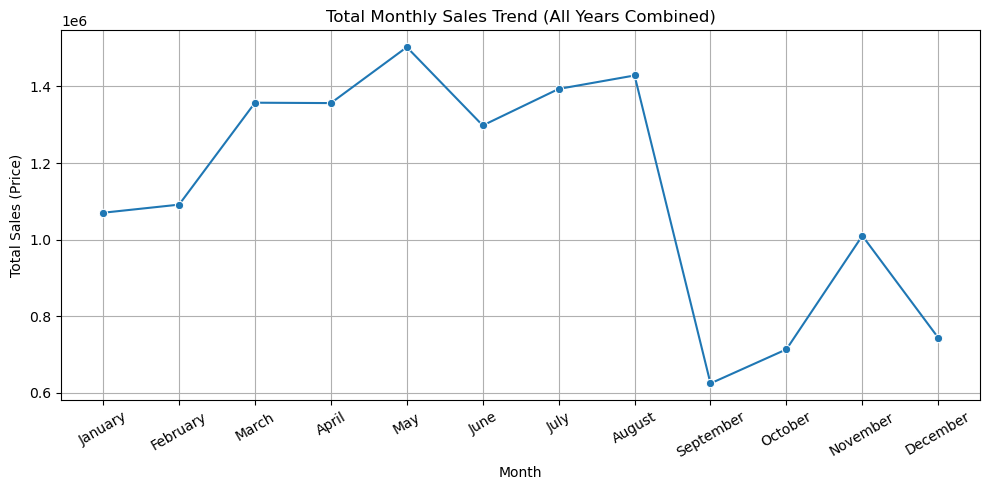

In [32]:
# Showing the Montly Sales(All Years combined) Trend

# Step 1: Group by 'Month name' and sum the 'price' for all years
df_sales_by_month = df_line.groupby('Month name', observed=False)['price'].sum().reset_index()

# Step 2: Sort by the correct month order
df_sales_by_month = df_sales_by_month.sort_values('Month name')

# Step 3: Plotting the sales trend by month
plt.figure(figsize=(10, 5))

# Use Seaborn's lineplot for better visualization
sns.lineplot(data=df_sales_by_month, x='Month name', y='price', marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales (Price)')
plt.title('Total Monthly Sales Trend (All Years Combined)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Add grid lines
plt.grid()

# Display the chart
plt.tight_layout()
plt.show()


## Key insights from Task 2
- 1) Year by year sales growed up  📈
- 2) Seasonal Fluctuations: Sales appear to fluctuate seasonally, with potential peaks and troughs occurring at specific times of the year.
- 3) Year-Specific Trends:

        2016: Sales started relatively high, then declined towards the middle of the year before rebounding slightly.

        2017: Sales continued to increase from the previous year, showing a more consistent upward trend.

        2018: Sales experienced a significant jump, particularly in the later part of the year, indicating strong growth.
     
- 4) Monthly Sales Patterns:

        Peak Seasons: There seem to be specific months or periods where sales are consistently higher, suggesting potential peak seasons for         the business.

        Seasonal Slumps: Conversely, there might be months or periods with lower sales, indicating potential seasonal downturns.
- 5) Peak sales was in Novemer of 2017 (Might be the Black Friday...)🚀
- 6) From 2 graph we see that Trend is decreasing in the Autumn and Winter. Minimum Sales was is in September.
- 7) Sales increased from January and was approximatily stable 'till August (In this time we can do giveaways to improve media exposure)👀 

## Task 3

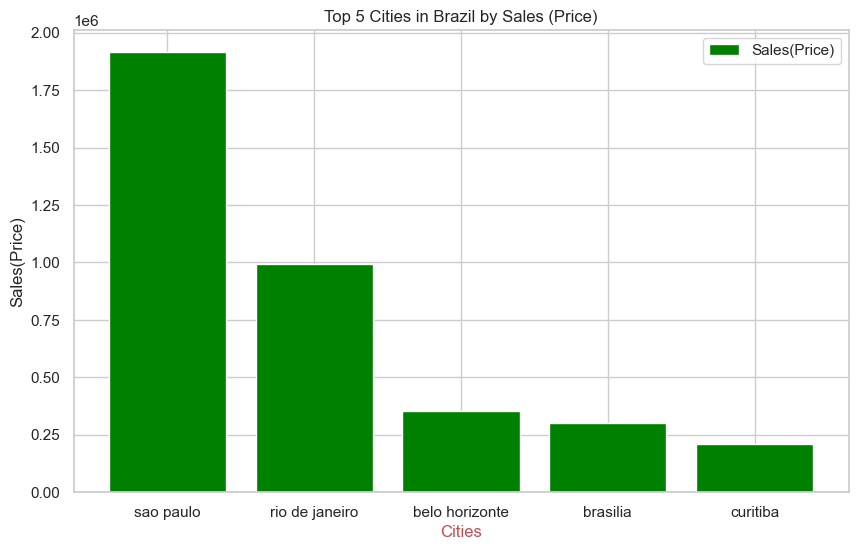

In [301]:
# Top 5 cities(there is no country but Brazil) by total sales and contribution [Datasets: ordered_items_csv,customers_csv, ordered_items_csv]
# 1 Merging data 
df_cities = pd.merge(customers_csv,orders_csv, on ='customer_id')
df_cities = pd.merge(df_cities, ordered_items_csv, on ='order_id') 

# 2 Filtering data
cities_data = df_cities.groupby('customer_city')['price'].sum().reset_index()
cities = data.nlargest(5,'price')


# 3 Data visualization part
plt.figure(figsize=(10,6))
plt.bar(cities['customer_city'],cities['price'],color='green')
plt.title('Top 5 Cities in Brazil by Sales (Price)')
plt.xlabel('Cities',color='r')
plt.ylabel('Sales(Price)')
plt.legend(['Sales(Price)'])
plt.show()

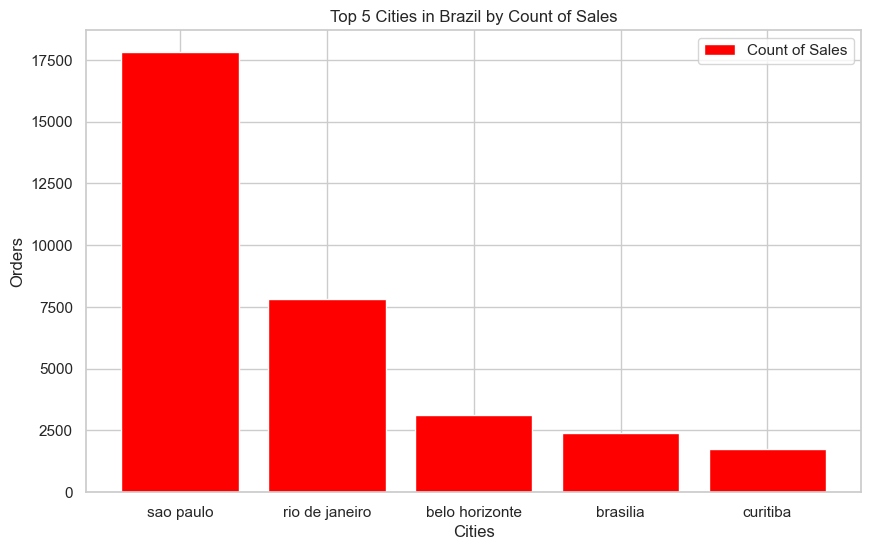

In [319]:
# Top 5 cities(there is no country but Brazil) by total sales and contribution [Datasets: ordered_items_csv,customers_csv, ordered_items_csv]
# Filtering DataFrame
count_of_sales = df_cities.groupby('customer_city').size().reset_index(name='order_count')
count_of_sales = count_of_sales.nlargest(5,'order_count')

# Data visalization
# Data visualization
plt.figure(figsize=(10, 6))
plt.bar(count_of_sales['customer_city'], count_of_sales['order_count'], color='red')  # Use red for bars
plt.xlabel('Cities')
plt.ylabel('Orders')
plt.title('Top 5 Cities in Brazil by Count of Sales')
plt.legend(['Count of Sales'], loc='upper right')  # Proper placement of the legend
plt.show()


## Key insigts from Task 3
- 1) Sao Paulo: This city clearly dominates the list, indicating significantly higher sales compared to the others.
- 2) Rio de Janeiro: While trailing Sao Paulo, Rio de Janeiro still maintains a substantial lead over the remaining cities.
- 3) Belo Horizonte, Brasilia, and Curitiba: These cities demonstrate similar sales levels, suggesting a more competitive landscape.
- 4) Even count of Sales diagram approx same with Sales(Price) diagram ,  that could be proved our hypotheses